In [39]:
from transformers import pipeline
from sklearn.metrics import confusion_matrix

hf_sent = pipeline('sentiment-analysis')


import pandas as pd 



In [40]:
def pred_sent_on_gen(gen_caption):
    """
    predict the sentiment on a generated caption and return the label
    """
    tok_pred = " ".join(gen_caption[:-1])
    return hf_sent(gen_caption)



In [54]:
t_s = pd.read_csv('positive_train_pred')

train_sample = t_s

train_sample['hf_sent_gen'] = train_sample['pred_captions'].apply(lambda x: pred_sent_on_gen(x))
train_sample['hf_sent_gen_class'] = train_sample['hf_sent_gen'].apply(lambda x: x[0]['label'])
train_sample['hf_sent_gen_conf'] = train_sample['hf_sent_gen'].apply(lambda x: x[0]['score'])

tn, fp, fn, tp = confusion_matrix(train_sample['hf_sent_class'], train_sample['hf_sent_gen_class']).ravel()
print("----POSITIVE SENTIMENT----")
print("----Train---")
print("Total: ", tp+tn+fp+fn)
print("PREDICTED POSITIVE: ", tp+ fp)
print("PREDICTED NEGATIVE: ", tn+ fn)
t_s = pd.read_csv('positive_test_pred')

test_sample = t_s

test_sample['hf_sent_gen'] = test_sample['pred_captions'].apply(lambda x: pred_sent_on_gen(x))
test_sample['hf_sent_gen_class'] = test_sample['hf_sent_gen'].apply(lambda x: x[0]['label'])
test_sample['hf_sent_gen_conf'] = test_sample['hf_sent_gen'].apply(lambda x: x[0]['score'])

tn, fp, fn, tp = confusion_matrix(test_sample['hf_sent_class'], test_sample['hf_sent_gen_class']).ravel()

print("----Test---")
print("Total: ", tp+tn+fp+fn)
print("PREDICTED POSITIVE: ", tp+ fp)
print("PREDICTED NEGATIVE: ", tn+ fn)

----POSITIVE SENTIMENT----
----Train---
Total:  100
PREDICTED POSITIVE:  65
PREDICTED NEGATIVE:  35
----Test---
Total:  5000
PREDICTED POSITIVE:  3390
PREDICTED NEGATIVE:  1610


In [55]:
test_sample['hf_sent_gen_class'].value_counts()



POSITIVE    3390
NEGATIVE    1610
Name: hf_sent_gen_class, dtype: int64

In [56]:
test_sample['hf_sent_class'].value_counts()


POSITIVE    3438
NEGATIVE    1562
Name: hf_sent_class, dtype: int64

<AxesSubplot:>

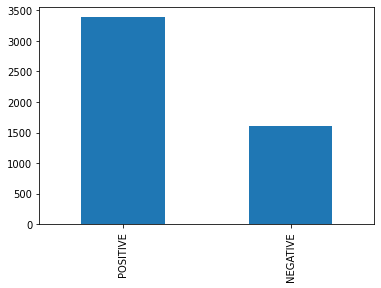

In [57]:
test_sample['hf_sent_gen_class'].value_counts().plot(kind='bar')



<AxesSubplot:>

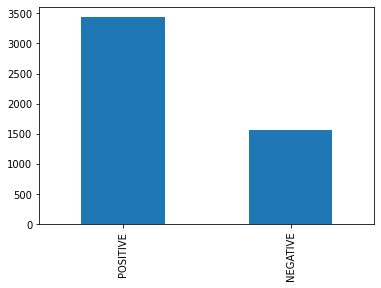

In [58]:
test_sample['hf_sent_class'].value_counts().plot(kind='bar')

In [50]:
t_s = pd.read_csv('negative_train_pred')

train_sample = t_s

train_sample['hf_sent_gen'] = train_sample['pred_captions'].apply(lambda x: pred_sent_on_gen(x))
train_sample['hf_sent_gen_class'] = train_sample['hf_sent_gen'].apply(lambda x: x[0]['label'])
train_sample['hf_sent_gen_conf'] = train_sample['hf_sent_gen'].apply(lambda x: x[0]['score'])

tn, fp, fn, tp = confusion_matrix(train_sample['hf_sent_class'], train_sample['hf_sent_gen_class']).ravel()
print("----NEGATIVE SENTIMENT----")
print("----Train---")
print("Total: ", tp+tn+fp+fn)
print("PREDICTED POSITIVE: ", tp+ fp)
print("PREDICTED NEGATIVE: ", tn+ fn)
t_s = pd.read_csv('negative_test_pred')

test_sample = t_s

test_sample['hf_sent_gen'] = test_sample['pred_captions'].apply(lambda x: pred_sent_on_gen(x))
test_sample['hf_sent_gen_class'] = test_sample['hf_sent_gen'].apply(lambda x: x[0]['label'])
test_sample['hf_sent_gen_conf'] = test_sample['hf_sent_gen'].apply(lambda x: x[0]['score'])

tn, fp, fn, tp = confusion_matrix(test_sample['hf_sent_class'], test_sample['hf_sent_gen_class']).ravel()

print("----Test---")
print("Total: ", tp+tn+fp+fn)
print("PREDICTED POSITIVE: ", tp+ fp)
print("PREDICTED NEGATIVE: ", tn+ fn)

----NEGATIVE SENTIMENT----
----Train---
Total:  100
PREDICTED POSITIVE:  10
PREDICTED NEGATIVE:  90
----Test---
Total:  5000
PREDICTED POSITIVE:  758
PREDICTED NEGATIVE:  4242


In [51]:
test_sample['hf_sent_gen_class'].value_counts()

NEGATIVE    4242
POSITIVE     758
Name: hf_sent_gen_class, dtype: int64

<AxesSubplot:>

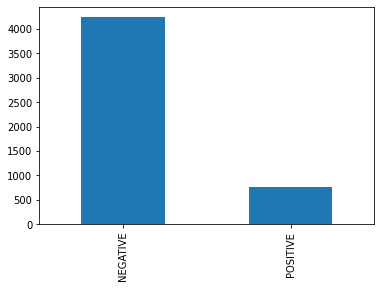

In [52]:
test_sample['hf_sent_gen_class'].value_counts().plot(kind='bar')

<AxesSubplot:>

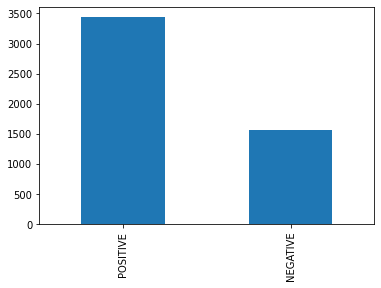

In [53]:
test_sample['hf_sent_class'].value_counts().plot(kind='bar')